In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import csv
import requests
import pprint
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
covidCSVDataDF2 = pd.read_csv("COVID19_CDC_Vaccination_CSV_Download.csv")
covidCSVDataDF2.sort_values("PARTIALLY_OF_FULLY_VACCINATED_PERCENT",ascending=False)

,DATE,GEOGRAPHY_LEVEL,GEOGRAPHY_NAME,DEMOGRAPHIC_GROUP,DEMOGRAPHIC_CATEGORY,PARTIALLY_OR_FULLY_VACCINATED_PERSONS,FULLY_VACCINATED_PERSONS,POPULATION,PARTIALLY_OF_FULLY_VACCINATED_PERCENT,FULLY_VACCINATED_PERCENT,TOTAL_DOSES_ADMINISTERED,TOTAL_DOSES_DISTRIBUTED,SOURCEINFO,USAFACTS_INGESTION_DATE
46363,2022-02-05,State,Rhode Island,Total,Total,1006385.0,841428.0,1059361.0,0.949992,0.794279,2096823.0,2442065.0,CDC State and National Vaccination Data,2022-02-06T12:25:10.670Z
30791,2022-10-26,State,Maine,Total,Total,1276928.0,1105058.0,1344212.0,0.949945,0.822086,3272422.0,4420150.0,CDC State and National Vaccination Data,2022-11-03T13:25:33.113Z
56020,2022-05-04,State,Puerto Rico,Total,Total,3033624.0,2652295.0,3193694.0,0.949879,0.830479,7175159.0,7513550.0,CDC State and National Vaccination Data,2022-05-05T13:25:11.972Z
52843,2022-04-14,State,American Samoa,Total,Total,45015.0,41214.0,47392.0,0.949844,0.869640,107224.0,115210.0,CDC State and National Vaccination Data,2022-04-15T09:25:10.104Z
19547,2022-02-24,State,District of Columbia,Total,Total,670350.0,503427.0,705749.0,0.949842,0.713323,1412520.0,1771405.0,CDC State and National Vaccination Data,2022-02-25T12:25:17.073Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63745,2021-01-05,State,Federated States of Micronesia,Total,Total,NaN,NaN,103643.0,NaN,NaN,30.0,9800.0,CDC State and National Vaccination Data,2021-01-06T10:00:18.231Z
63746,2021-01-05,State,Marshall Islands,Total,Total,NaN,NaN,58413.0,NaN,NaN,0.0,1200.0,CDC State and National Vaccination Data,2021-01-06T10:00:18.231Z
63747,2021-01-05,State,Bureau of Prisons,Total,Total,NaN,NaN,NaN,NaN,NaN,8700.0,12800.0,CDC State and National Vaccination Data,2021-01-06T10:00:18.231Z
63748,2021-01-05,State,Dept of Defense,Total,Total,NaN,NaN,NaN,NaN,NaN,67766.0,270125.0,CDC State and National Vaccination Data,2021-01-06T10:00:18.231Z


In [3]:
covidCSVDataDF2["Percent_Fully_Administered"] = covidCSVDataDF2["TOTAL_DOSES_ADMINISTERED"]/covidCSVDataDF2["TOTAL_DOSES_DISTRIBUTED"]

In [4]:
fullyAdminGeogName = covidCSVDataDF2[["GEOGRAPHY_NAME","Percent_Fully_Administered","DATE"]]
fullyAdminGeogName.sort_values("Percent_Fully_Administered",ascending=False).head(60)
nonStateNames = ["Marshall Islands","Bureau of Prisons",'Long Term Care','Indian Health Svc','Veterans Health','Federated States of Micronesia','Republic of Palau','Northern Mariana Islands','Dept of Defense']
covidCSVDataDF2 = covidCSVDataDF2[~covidCSVDataDF2["GEOGRAPHY_NAME"].isin(nonStateNames)]

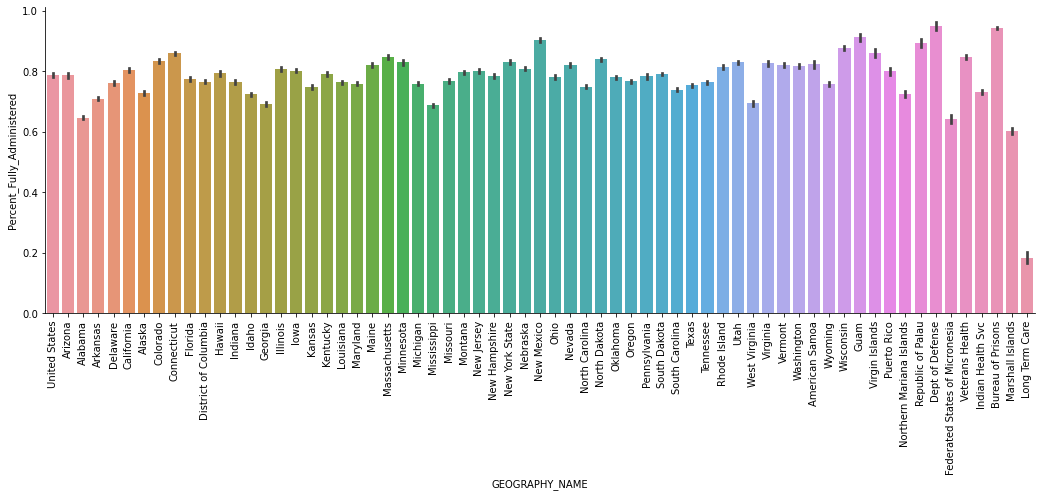

In [5]:
sb.catplot(x="GEOGRAPHY_NAME",y="Percent_Fully_Administered",data=fullyAdminGeogName,aspect=3,kind="bar").set_xticklabels(rotation=90)

In [6]:
len(covidCSVDataDF2["GEOGRAPHY_NAME"].unique())

56

In [7]:
covidCSVDataDF = pd.read_csv("Covid USA CSV.csv",skiprows=1)

In [8]:
covidCSVDataDF.columns

Index(['date', 'death', 'deathIncrease', 'inIcuCumulative', 'inIcuCurrently',
       'hospitalizedIncrease', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'negative', 'negativeIncrease',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'states', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

In [9]:
covidCSVDataDF.head(377)

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
0,2021-03-07,515151.0,842,45475.0,8134.0,726,40199.0,776361.0,74582825.0,131835,4281.0,2802.0,28756489.0,41835,56,363825123,1170059
1,2021-03-06,514309.0,1680,45453.0,8409.0,503,41401.0,775635.0,74450990.0,143835,4280.0,2811.0,28714654.0,60015,56,362655064,1430992
2,2021-03-05,512629.0,2221,45373.0,8634.0,2781,42541.0,775132.0,74307155.0,271917,4275.0,2889.0,28654639.0,68787,56,361224072,1744417
3,2021-03-04,510408.0,1743,45293.0,8970.0,1530,44172.0,772351.0,74035238.0,177957,4267.0,2973.0,28585852.0,65487,56,359479655,1590984
4,2021-03-03,508665.0,2449,45214.0,9359.0,2172,45462.0,770821.0,73857281.0,267001,4260.0,3094.0,28520365.0,66836,56,357888671,1406795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2020-02-29,5.0,1,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,18.0,3,8,6555,65
373,2020-02-28,4.0,2,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,15.0,2,7,6490,3
374,2020-02-27,2.0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,13.0,1,7,6487,6446
375,2020-02-26,2.0,2,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,12.0,2,6,41,0


In [10]:
onlyDeathDF = covidCSVDataDF[["date","death","deathIncrease","hospitalizedIncrease"]]
sb.set(font_scale=1)

In [11]:
onlyDeathDFStart = onlyDeathDF.sort_values("death",ascending=True).head(100)
onlyDeathDF.head(100)

,date,death,deathIncrease,hospitalizedIncrease
0,2021-03-07,515151.0,842,726
1,2021-03-06,514309.0,1680,503
2,2021-03-05,512629.0,2221,2781
3,2021-03-04,510408.0,1743,1530
4,2021-03-03,508665.0,2449,2172
...,...,...,...,...
95,2020-12-02,264990.0,2811,5238
96,2020-12-01,262179.0,2489,4916
97,2020-11-30,259690.0,1037,3394
98,2020-11-29,258653.0,825,2429


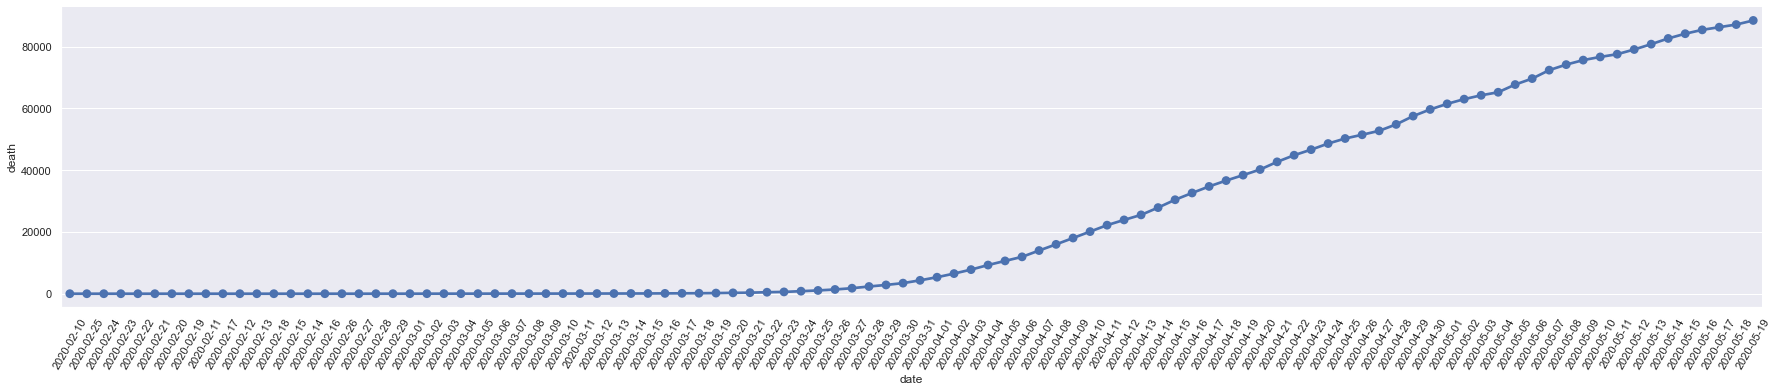

In [12]:
sb.catplot(x="date",y="death",data=onlyDeathDFStart,kind="point",aspect=5).set_xticklabels(rotation=60)

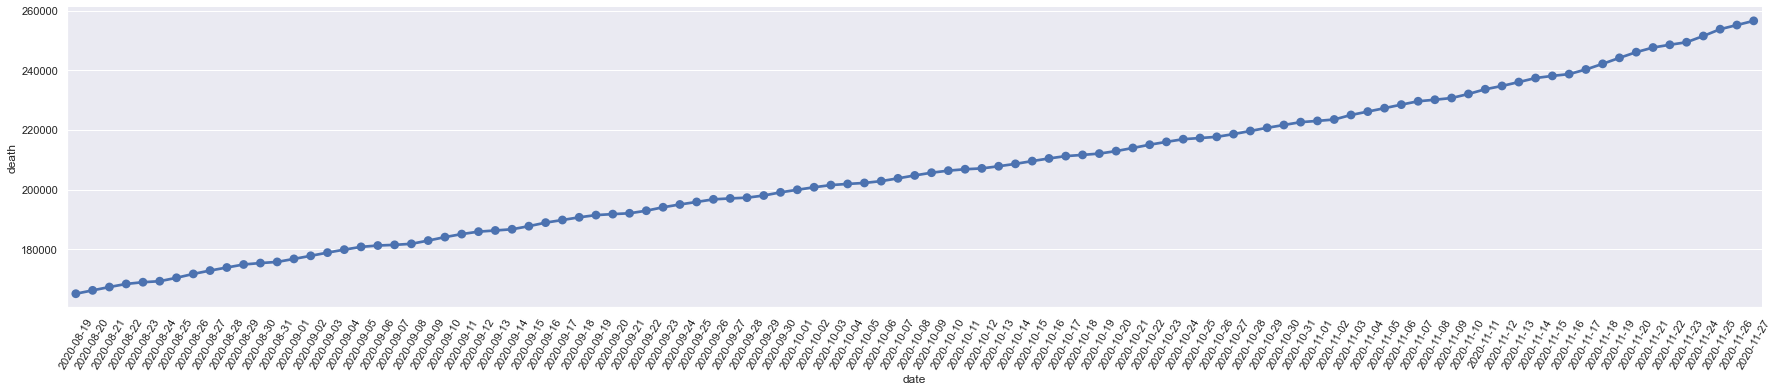

In [13]:
onlyDeathDFEnd = onlyDeathDF.loc[100:200].sort_values("death",ascending=True)
sb.catplot(x="date",y="death",data=onlyDeathDFEnd,kind="point",aspect=5).set_xticklabels(rotation=60)

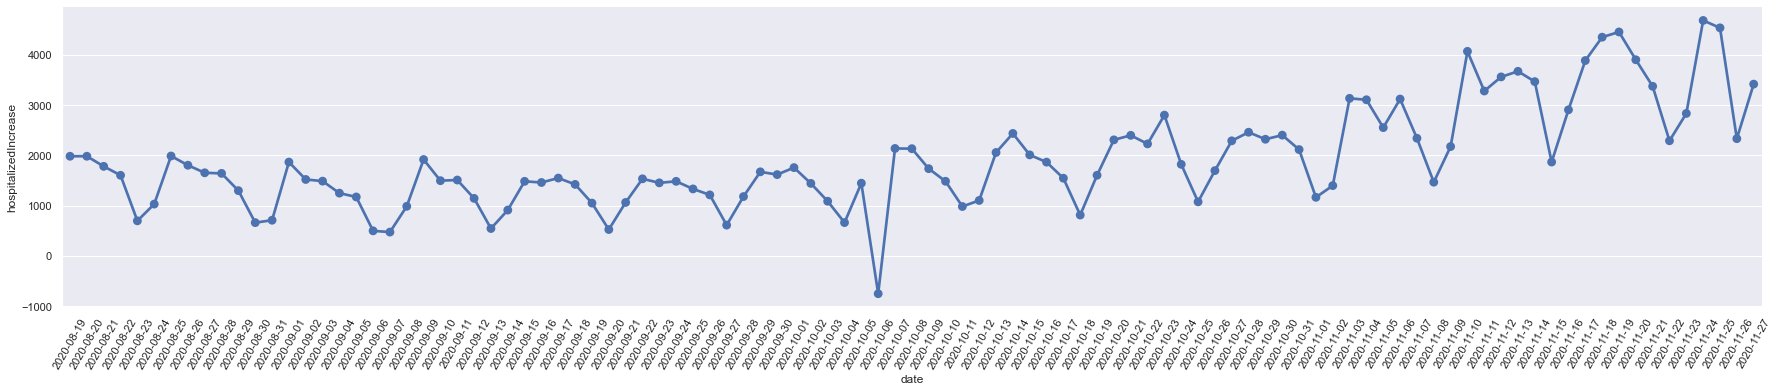

In [14]:
sb.catplot(x="date",y="hospitalizedIncrease",data=onlyDeathDFEnd,kind="point",aspect=5).set_xticklabels(rotation=60)

In [15]:
totalAdministered = pd.read_csv("data_table_for_total_deaths__the_united_states.csv",skiprows=2)
totalAdministered

,Geography,Date,Total Deaths
0,United States,May 3 2023,1131819
1,United States,Apr 26 2023,1130710
2,United States,Apr 19 2023,1129617
3,United States,Apr 12 2023,1128366
4,United States,Apr 5 2023,1127056
...,...,...,...
166,United States,Feb 26 2020,0
167,United States,Feb 19 2020,0
168,United States,Feb 12 2020,0
169,United States,Feb 5 2020,0


In [17]:
totalAdministered = totalAdministered.sort_values("Total Deaths",ascending=True)
totalAdministered

,Geography,Date,Total Deaths
170,United States,Jan 29 2020,0
166,United States,Feb 26 2020,0
169,United States,Feb 5 2020,0
168,United States,Feb 12 2020,0
167,United States,Feb 19 2020,0
...,...,...,...
4,United States,Apr 5 2023,1127056
3,United States,Apr 12 2023,1128366
2,United States,Apr 19 2023,1129617
1,United States,Apr 26 2023,1130710


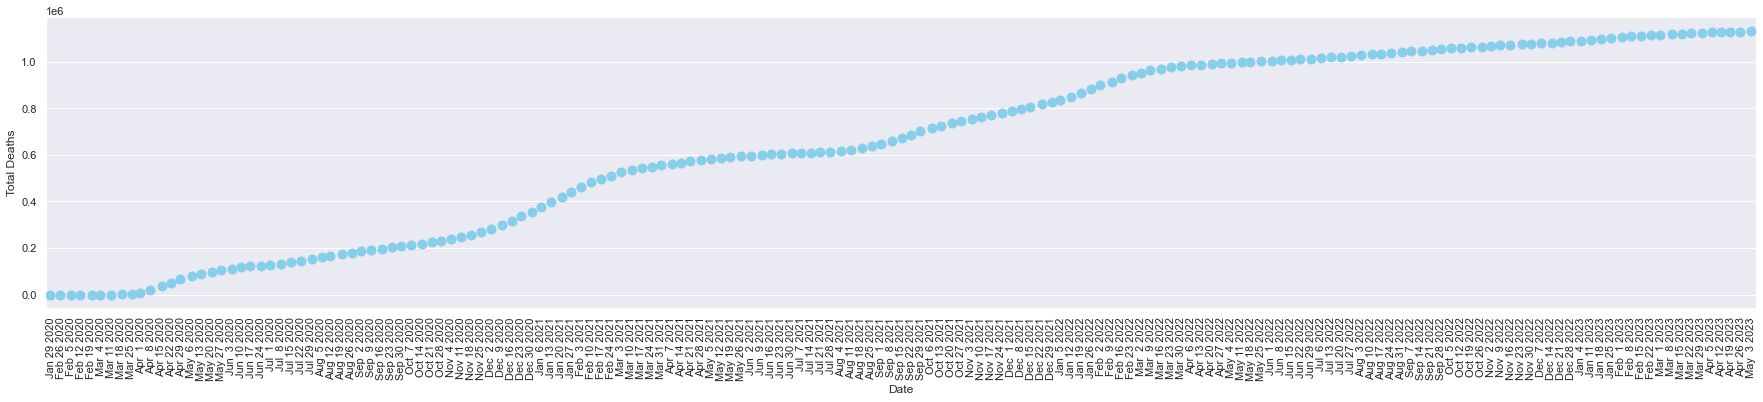

In [18]:
sb.catplot(x="Date",y="Total Deaths",data=totalAdministered,aspect=5,s=10,color="SkyBlue").set_xticklabels(rotation=90)

In [19]:
covidAPIData2URL = "https://data.cdc.gov/resource/unsk-b7fc.json"
r = requests.get(covidAPIData2URL)
json = r.json()
covidAPIData2DF = pd.DataFrame(json)
# I want to find what was the most common vaccine and 

In [20]:
covidAPIData2DF

,date,mmwr_week,location,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_novavax,distributed_unk_manuf,dist_per_100k,...,dist_bivalent_mod,bivalent_booster_5plus,bivalent_booster_5plus_pop_pct,bivalent_booster_12plus,bivalent_booster_12plus_pop_pct,bivalent_booster_18plus,bivalent_booster_18plus_pop_pct,bivalent_booster_65plus,bivalent_booster_65plus_pop_pct,second_booster
0,2023-05-10T00:00:00.000,19,NE,5481710,152400,1647380,2905630,7400,0,283379,...,193420,340508,18.9,332054,20.5,319161,21.9,151146,48.4,NaN
1,2023-05-10T00:00:00.000,19,LA,10282120,330500,3807980,5164550,10100,0,221178,...,328400,359506,8.3,356199,9.1,349934,9.8,184844,24.9,NaN
2,2023-05-10T00:00:00.000,19,GA,28727475,869100,9763000,14773655,43400,0,270569,...,1023320,1126791,11.3,1103841,12.3,1067468,13.2,476297,31.4,NaN
3,2023-05-10T00:00:00.000,19,WY,1281755,49300,490040,585605,3700,0,221466,...,50600,65920,12.1,64919,13.2,63244,14.2,34832,35.1,NaN
4,2023-05-10T00:00:00.000,19,CO,17769135,501900,5402640,9029715,43600,0,308560,...,757520,1268501,23.4,1229981,24.9,1176686,26.2,462990,55,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-01-25T00:00:00.000,4,NH,4946690,188800,1585340,3168150,4400,0,363805,...,141200,295591,22.8,290498,24.2,281246,25.5,136650,53.8,NaN
996,2023-01-25T00:00:00.000,4,NY,59601225,1959200,20689480,36922845,29700,0,306377,...,2109600,3161283,17.2,3101532,18.5,3010330,19.5,1302050,39.5,NaN
997,2023-01-25T00:00:00.000,4,OR,13675105,466500,4880260,8308345,20000,0,324228,...,446900,854601,21.4,830420,22.8,797222,23.8,345576,45.1,NaN
998,2023-01-25T00:00:00.000,4,DD2,7671550,210800,2458940,4967810,34000,0,0,...,129900,164977,0,161393,0,154729,0,29447,0,NaN


In [21]:
covidAPIData2DF
vaccineOnlyDF = covidAPIData2DF[["date","mmwr_week","distributed","location","distributed_moderna","distributed_pfizer","distributed_novavax","distributed_unk_manuf"]].reset_index()
# creating a new DF with only the number of patietns who got each vaccine 

In [22]:
vaccineOnlyDF.sort_values("distributed",ascending=True)

,index,date,mmwr_week,distributed,location,distributed_moderna,distributed_pfizer,distributed_novavax,distributed_unk_manuf
980,980,2023-01-25T00:00:00.000,4,10072670,LA,4073380,5660890,8400,0
900,900,2023-02-01T00:00:00.000,5,10089520,LA,4076780,5674240,8400,0
864,864,2023-02-08T00:00:00.000,6,10109460,LA,4081980,5688880,8400,0
807,807,2023-02-15T00:00:00.000,7,10127080,LA,4091180,5697200,8400,0
726,726,2023-02-22T00:00:00.000,8,10141420,LA,4094680,5707940,8500,0
...,...,...,...,...,...,...,...,...,...
32,32,2023-05-10T00:00:00.000,19,984444295,US,313437660,505345015,1410700,0
254,254,2023-04-19T00:00:00.000,16,9851220,VA2,4250780,3780780,11800,0
186,186,2023-04-26T00:00:00.000,17,9862200,VA2,4250780,3780780,11800,0
115,115,2023-05-03T00:00:00.000,18,9883700,VA2,4250780,3780780,12100,0


In [23]:
vaccineOnlyDF["mmwr_week"] = vaccineOnlyDF["mmwr_week"].astype(float)
vaccineOnlyDF["distributed_pfizer"] = vaccineOnlyDF["distributed_pfizer"].astype(float)
vaccineOnlyDF["distributed_moderna"] = vaccineOnlyDF["distributed_moderna"].astype(float)
vaccineOnlyDF["distributed_novavax"] = vaccineOnlyDF["distributed_novavax"].astype(float)
vaccineOnlyDF["distributed_unk_manuf"] = vaccineOnlyDF["distributed_unk_manuf"].astype(float)
# got this from stackoverflow I don't know why it wouldn't read the columns as numbers 
vaccineOnlyDF["date"] = vaccineOnlyDF["date"].str.rstrip('T00:00:00.000')
vaccineOnlyDF = vaccineOnlyDF.sort_values("date",ascending=True)

In [24]:
vaccineOnlyDF["Total Vaccines Distributed"] = vaccineOnlyDF["distributed_pfizer"]+vaccineOnlyDF["distributed_moderna"]+vaccineOnlyDF["distributed_novavax"]+vaccineOnlyDF["distributed_unk_manuf"]
vaccineOnlyDF = vaccineOnlyDF.sort_values("Total Vaccines Distributed",ascending=False)
vaccineOnlyDF["distributed_novavax"].max()

1410700.0

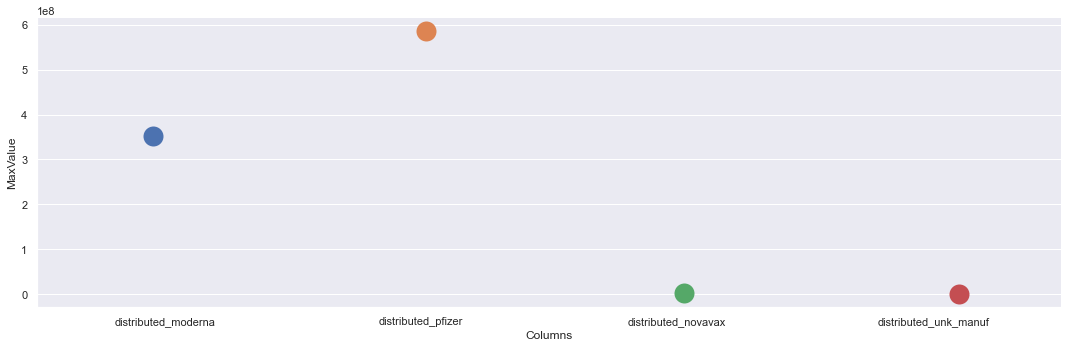

In [25]:
maxValues = vaccineOnlyDF[["distributed_moderna","distributed_pfizer","distributed_novavax","distributed_unk_manuf"]].max()
maxDF = pd.DataFrame({'Columns':maxValues.index, 'MaxValue': maxValues.values})
anotherDF = sb.catplot(x='Columns', y='MaxValue', data=maxDF, aspect=3,s=20)

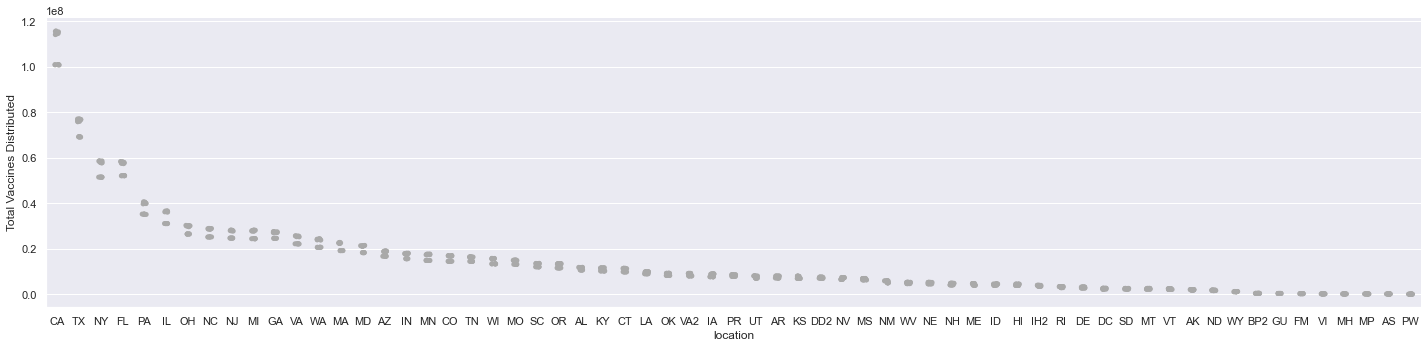

In [26]:
maxPerState = vaccineOnlyDF.groupby("location")["Total Vaccines Distributed"].max().reset_index()
noUS = ["US"]
vaccineOnlyDF = vaccineOnlyDF[~vaccineOnlyDF["location"].isin(noUS)]

sb.catplot(x="location",y="Total Vaccines Distributed",data=vaccineOnlyDF,aspect=4,color="DarkGray")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

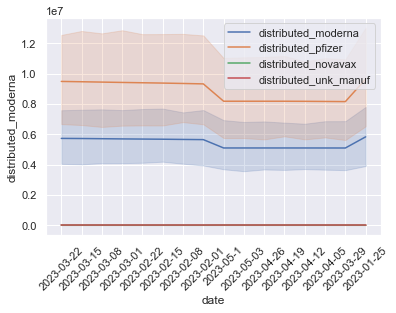

In [27]:
ax = sb.lineplot(x='date', y='distributed_moderna', data=vaccineOnlyDF, label='distributed_moderna')
ax = sb.lineplot(x='date', y='distributed_pfizer', data=vaccineOnlyDF, label='distributed_pfizer')
ax = sb.lineplot(x='date', y='distributed_novavax', data=vaccineOnlyDF, label='distributed_novavax')
ax = sb.lineplot(x='date', y='distributed_unk_manuf', data=vaccineOnlyDF, label='distributed_unk_manuf')
plt.xticks(rotation=45)

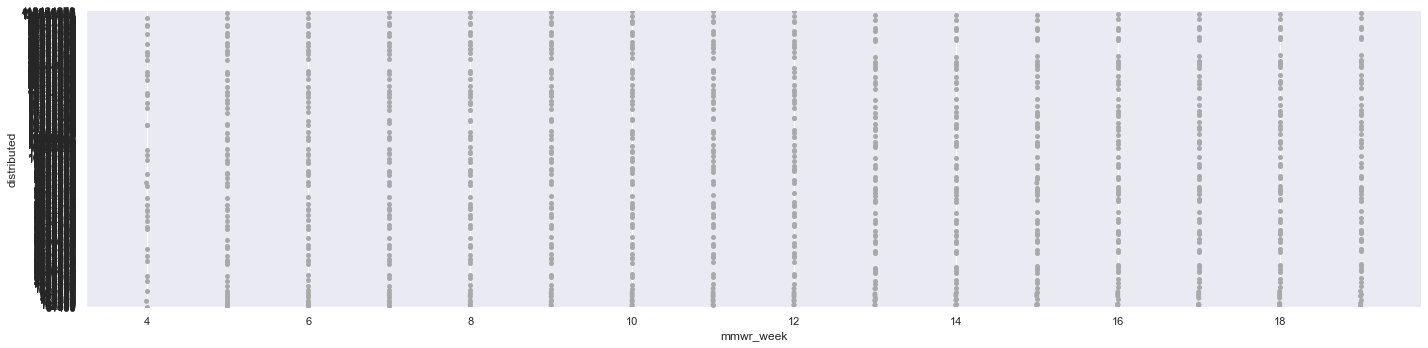

In [28]:
sb.catplot(x="mmwr_week",y="distributed",data=vaccineOnlyDF,aspect=4,color="DarkGray")